In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Grafik mit Querlinien gespeichert unter: analysis\plots\final_scientific_grid_plots.png


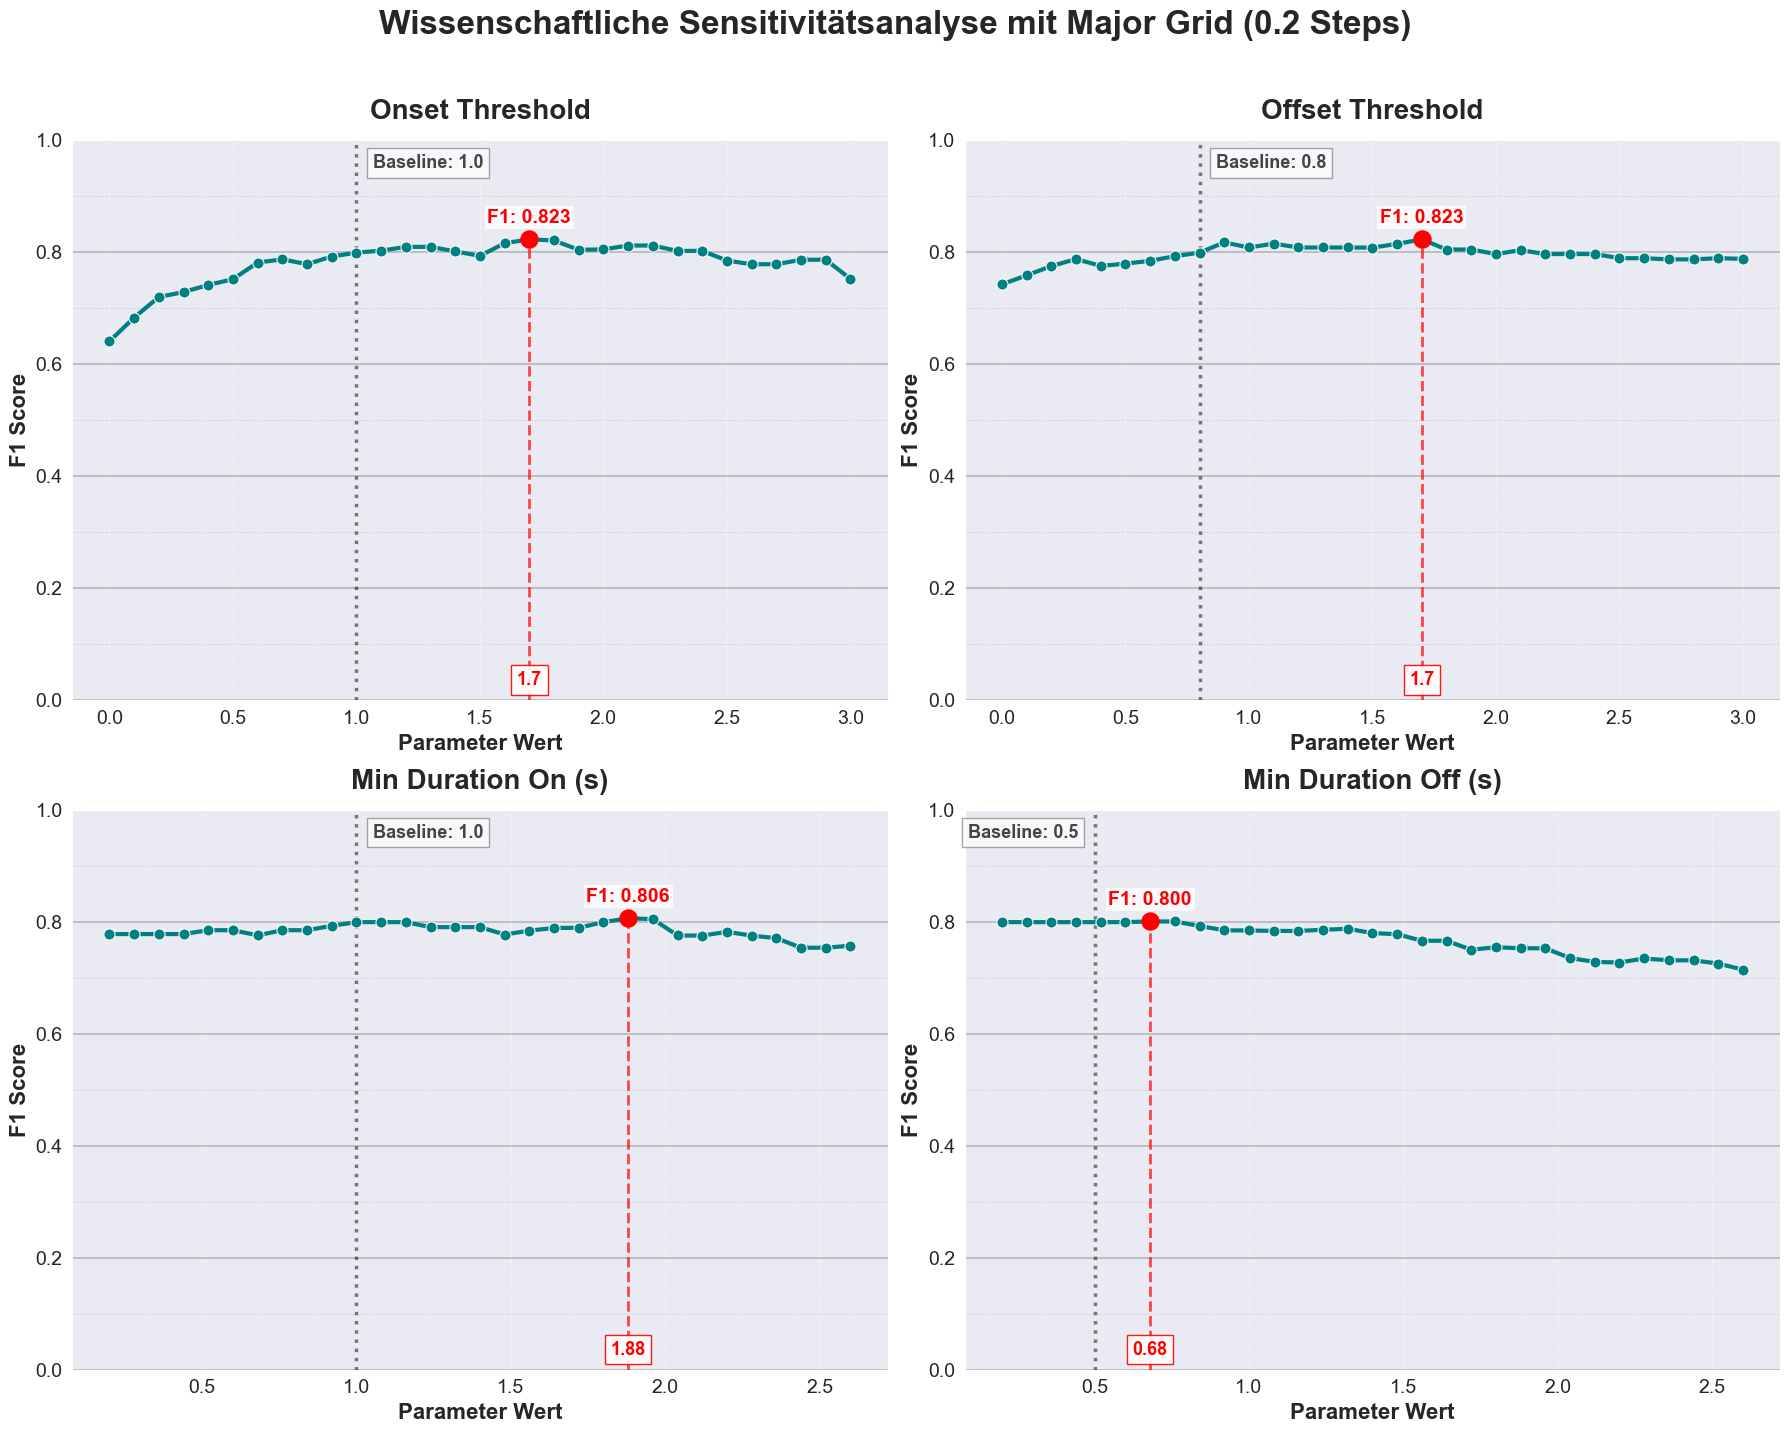

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib.ticker as ticker


# --- KONFIGURATION ---
DATA_DIR = "data"
PLOT_OUTPUT_DIR = os.path.join("analysis", "plots")

if not os.path.exists(PLOT_OUTPUT_DIR):
    os.makedirs(PLOT_OUTPUT_DIR)

FILES_CONFIG = {
    "param_sens_onset.csv":       ("segm_onset", "Onset Threshold", 1.0),
    "param_sens_offset.csv":      ("segm_offset", "Offset Threshold", 0.8),
    "param_sens_min_dur_on.csv":  ("segm_min_duration_on", "Min Duration On (s)", 1.0),
    "param_sens_min_dur_off.csv": ("segm_min_duration_off", "Min Duration Off (s)", 0.5)
}

# --- PLOTTING ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
axes = axes.flatten()

for i, (filename, (col_name, title, baseline_val)) in enumerate(FILES_CONFIG.items()):
    ax = axes[i]
    file_path = os.path.join(DATA_DIR, filename)
    
    if os.path.exists(file_path):
        df_sub = pd.read_csv(file_path)
        
        sns.lineplot(
            data=df_sub, x=col_name, y="AVG_SPEAKER_F1",
            marker="o", markersize=8, linewidth=3, ax=ax, color="teal", zorder=3
        )
        
        # --- BESTEN WERT BERECHNEN ---
        means = df_sub.groupby(col_name)['AVG_SPEAKER_F1'].mean().reset_index()
        best_point = means.sort_values('AVG_SPEAKER_F1', ascending=False).head(1)
        best_x = best_point[col_name].values[0]
        best_y = best_point['AVG_SPEAKER_F1'].values[0]
        
        # Y-Achse auf 0 bis 1.0 setzen
        ax.set_ylim(0, 1.0)
        
        # --- GITTERLINIEN (MAJOR & MINOR) ---
        # Major Ticks alle 0.2
        ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.2, 0.4, 0.6, 0.8, 1.0]))
        # Minor Ticks alle 0.1 für bessere Orientierung
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        
        # Major Grid: Durchgezogen und etwas kräftiger
        ax.grid(which='major', axis='y', linestyle='-', color='gray', alpha=0.5, linewidth=1.2, zorder=1)
        # Minor Grid: Gestrichelt und sehr dezent
        ax.grid(which='minor', axis='y', linestyle=':', color='gray', alpha=0.3, zorder=1)
        # X-Achse Grid
        ax.grid(axis='x', linestyle='--', alpha=0.4, zorder=1)
        
        y_min, y_max = ax.get_ylim()
        y_range = y_max - y_min
        x_min, x_max = ax.get_xlim()
        x_range = x_max - x_min
        
        # Markierung Best-Wert (Zorder höher als Grid)
        ax.scatter(best_x, best_y, color='red', s=150, zorder=5)
        ax.vlines(x=best_x, ymin=0, ymax=best_y, colors='red', linestyles='--', alpha=0.7, linewidth=2, zorder=4)
        
        # Text OBEN am Punkt: F1-Score
        ax.text(best_x, best_y + (y_range * 0.03), f"F1: {best_y:.3f}",
                color='red', fontweight='bold', ha='center', fontsize=14,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2), zorder=6)
        
        # Text UNTEN an der X-Achse: Parameter-Wert
        ax.text(best_x, 0.02, f"{best_x}",
                color='red', fontweight='bold', ha='center', va='bottom', fontsize=13,
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='red', lw=1), zorder=6)

        # --- BASELINE MARKIERUNG ---
        ax.vlines(x=baseline_val, ymin=0, ymax=1.0, colors='black', 
                  linestyles=':', linewidth=2.5, alpha=0.5, zorder=2)
        
        # Überlappungsschutz
        ha_baseline = 'left'
        x_text_offset = x_range * 0.02
        if abs(best_x - baseline_val) < (x_range * 0.1):
            ha_baseline = 'right'
            x_text_offset = -x_range * 0.02
            
        ax.text(
            baseline_val + x_text_offset, 0.95, 
            f"Baseline: {baseline_val}", 
            color='#444444', fontweight='bold', ha=ha_baseline, fontsize=13,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', lw=1), zorder=6
        )

        # --- DESIGN ---
        ax.set_title(title, fontsize=20, fontweight='bold', pad=15)
        ax.set_xlabel("Parameter Wert", fontsize=16, fontweight='bold')
        ax.set_ylabel("F1 Score", fontsize=16, fontweight='bold') 
        ax.tick_params(axis='both', labelsize=14)
        
    else:
        ax.text(0.5, 0.5, f"Datei nicht gefunden", ha='center', va='center', color='red', fontsize=16)

plt.suptitle("Wissenschaftliche Sensitivitätsanalyse mit Major Grid (0.2 Steps)", fontsize=24, y=1.02, fontweight='bold')
plt.tight_layout()

save_path = os.path.join(PLOT_OUTPUT_DIR, "final_scientific_grid_plots.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Grafik mit Querlinien gespeichert unter: {save_path}")

plt.show()